# CITS5508 Assignment 1 

- Author: Joo Kai Tay (22489437)

The following notebook contains code for classification tasks involving the Forest type mapping dataset for tasks 1 & 2 and the California Housing Proces dataset in task 3

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Importing useful libraries
import numpy as np
import os
import copy

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1 Binary Classification

Read the contents of training.csv and testing.csv. It is assumed that both datasets are present in the root directory of this project

In [2]:
import pandas as pd

testing_data = pd.read_csv('testing.csv')
training_data = pd.read_csv('training.csv')

## 1.1 Display and visualise the dataset

The following two cells display the first rows of both the training and testing dataset. It can be seen by inspection that there are 28 columns that are part of this dataset which can be grouped into 4 distinct categories:
- class: s, d, o, h
    - These describe the 4 classes that make up this dataset
- features b1 - b9
- features that start with pred_minus_obs_H
- features that start with pred_minus_obs_S

In [3]:
# Displaying the first 5 rows of the dataset
training_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [4]:
# Displaying the first 5 rows of the dataset
testing_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


## 1.2 Simpifying the classification task

The following cell removes all columns whose names begin with pred_minus_obs. This leaves only features b1-b9 in the training and testing sets.

In [5]:
features = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9']
training_data = training_data[['class'] + features]
testing_data = testing_data[['class'] + features]

## 1.3 Visualizing the dataset

The following cells display the different features b1-b9 for the training dataset. The following observations can be gleaned from the plots:

- Features b1, b4 and b7 seem to normally distributed.
- Features b2, b3, b5, b6, b8 and b9 are skewed to the right 

The right skew on these features might make it harder for some machine learning algorithms to detect patterns. It is important to transform these attributes to have more symmetrical distributions before fitting a model to the data.

Saving figure attribute_histogram_plots_training


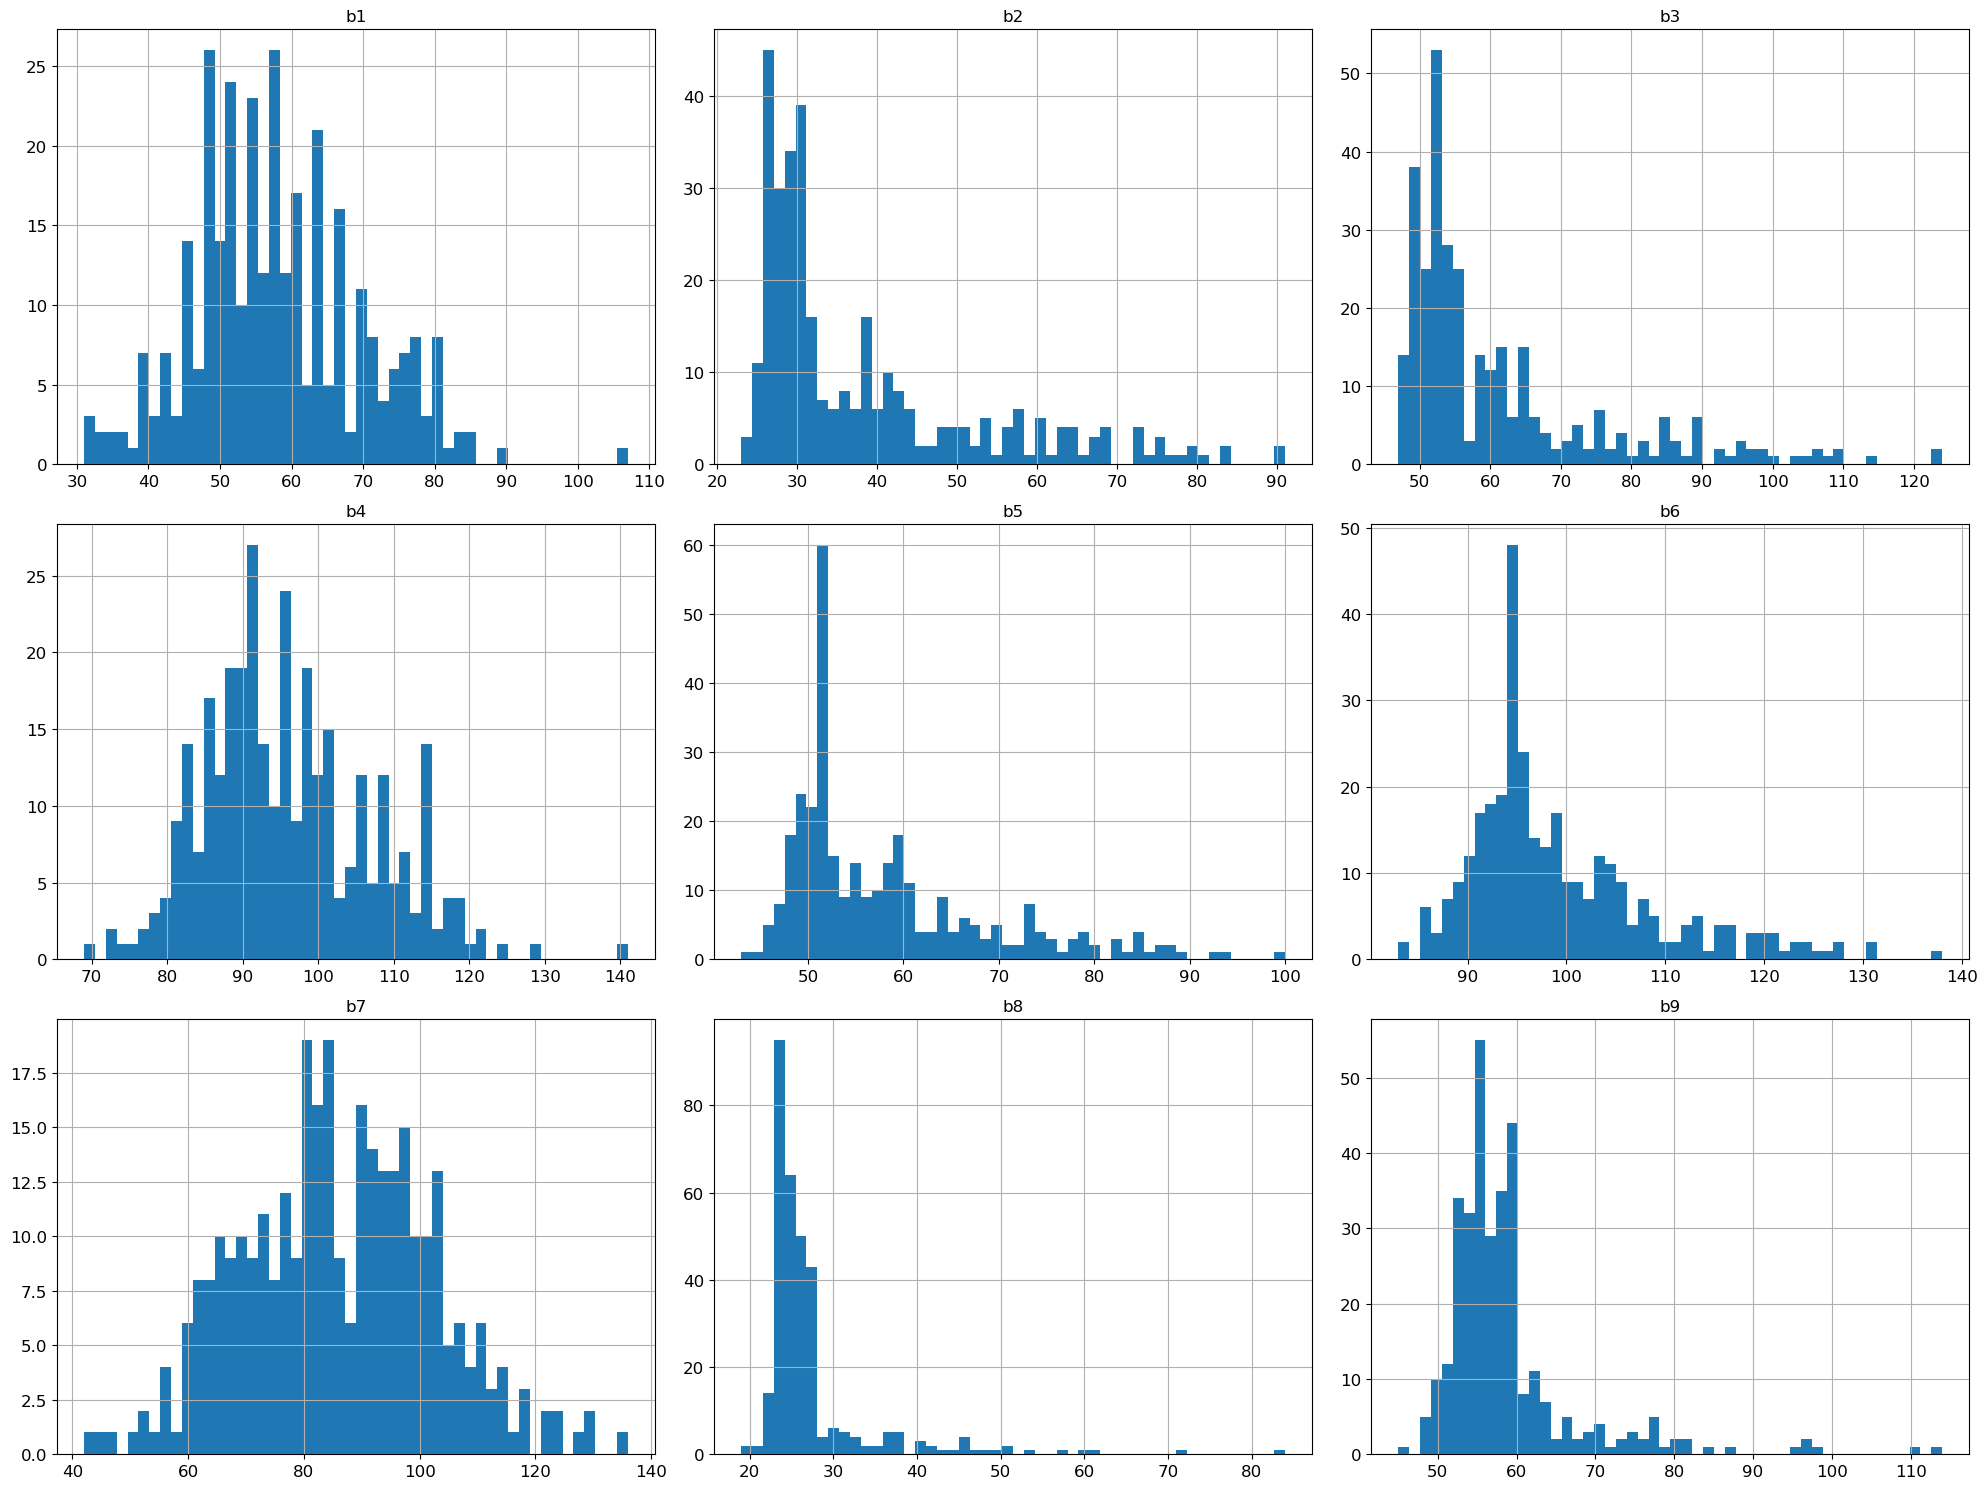

In [6]:
# Plotting the different attributes/columns in the dataset

%matplotlib inline
import matplotlib.pyplot as plt
training_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_training")
plt.show()

In [7]:
training_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000


The following cells display the different features b1-b9 for the testing dataset. The observations that can be gleaned from the plots are very similar to that of the training dataset:

- Features b1, b4 and b7 seem to normally distributed.
- Features b2, b3, b5, b6, b8 and b9 are skewed to the right 

A right skew means that the data extends much farther to the right of the median than the left. The right skew on these features might make it harder for some machine learning algorithms to detect patterns. 

It is important to transform these attributes to have more symmetrical distributions before running predictions on them. Section 2.5 of this notebook will cover using the Standard Scalar function to normalize the skew of these data points.

Saving figure attribute_histogram_plots_testing


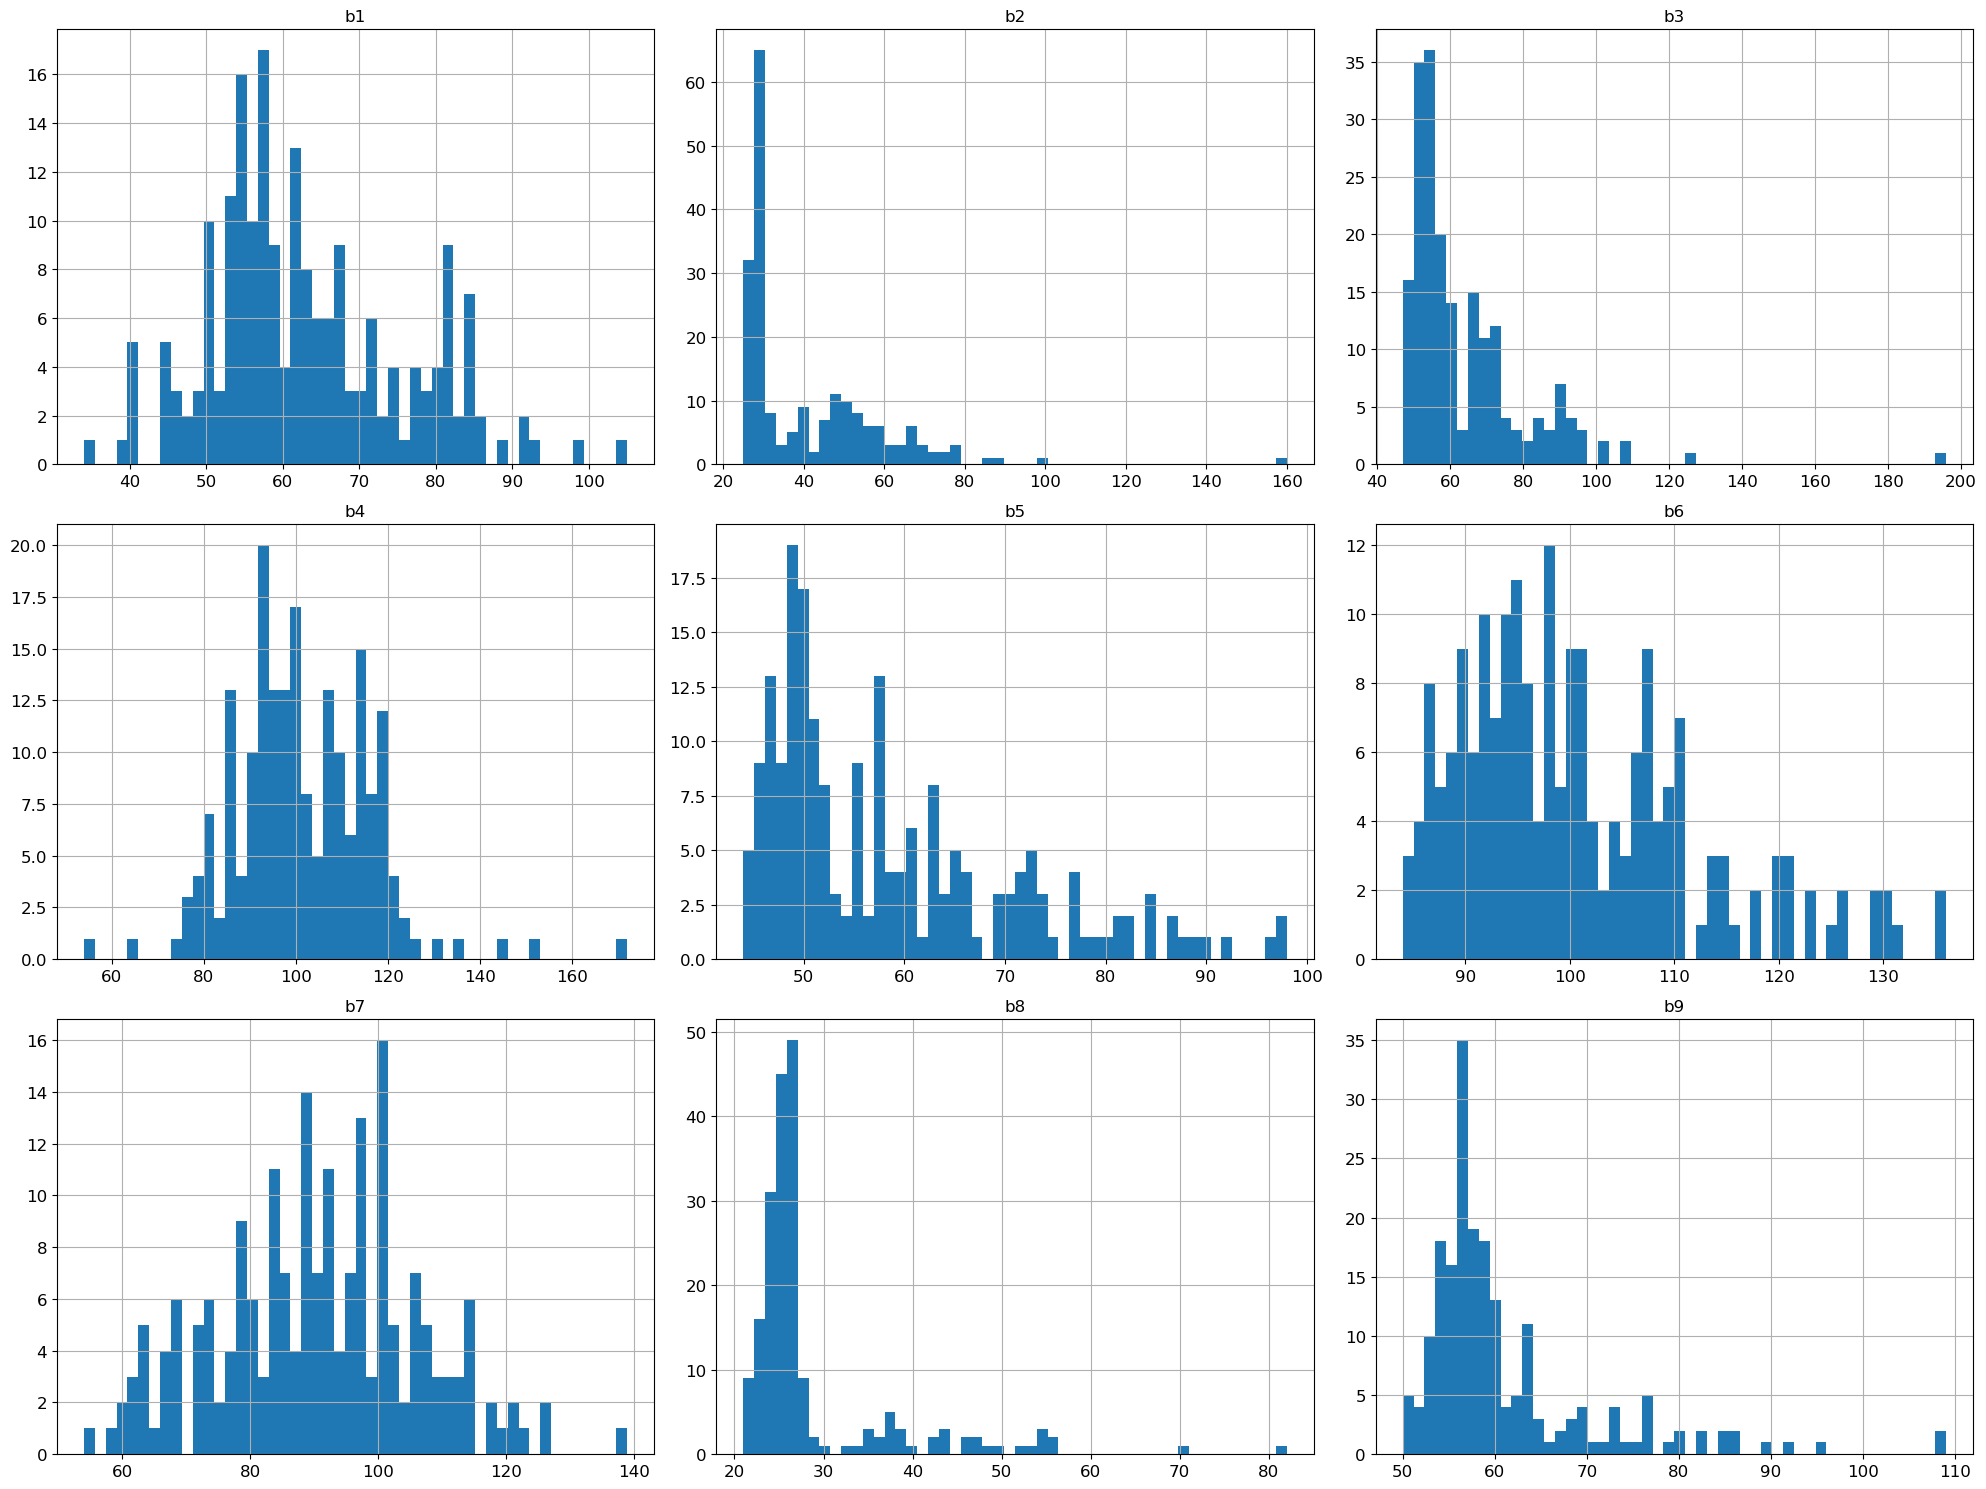

In [8]:
# Plotting the different attributes/columns in the dataset

%matplotlib inline
import matplotlib.pyplot as plt
testing_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_testing")
plt.show()

In [9]:
testing_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000


The following code counts the number of instances for each class label in order to determine if we have a balanced dataset. We can view the output of the count_instances() function to determine the number of non-null instances in the dataset.

It can be observed that the training data has an abundance of values for the s and d class label but a significantly lower proportion for values in the o and h class label.

- 136 instances for class 's'
- 105 instances for class 'd'
- 46 instances for class 'o'
- 38 instances for class 'h'

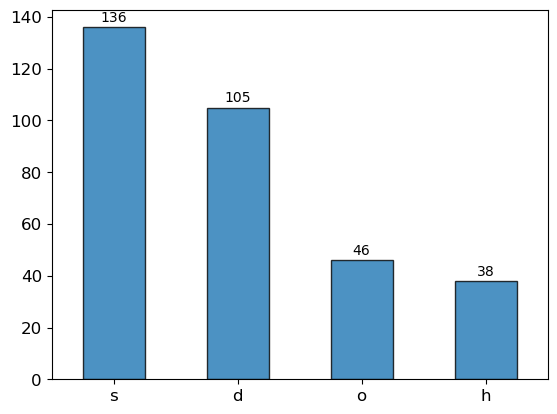

In [10]:
# Count the occurance of each label class and plot histogram

instances = training_data['class'].value_counts()
class_graph = instances.plot.bar(edgecolor='black', alpha=0.8)
plt.xticks(rotation = 360)

for rect in class_graph.patches:
    height = rect.get_height()
    x_position = rect.get_x() + rect.get_width() / 2
    label = f"{height:.0f}"  # Format the label to be displayed
    class_graph.annotate(label, (x_position, height), textcoords="offset points", xytext=(0, 4), ha='center', fontsize=10)

plt.show()

## 2.5 Feature Scaling

The following code performs appropirate feature scaling on the datasets before doing the classification. The StandardScaler function from the sklearn.preprocessing package is used for this purpose. Standardization scales the data to have a mean value of 0 and standard deviation of 1. This makes it more useful for the classification tasks that we are about to attempt.

The function pre_process_data() returns a new copy of the training and testing dataset with the appropriate features/classes removed.

In [11]:
# Declaring variables to be passed to pre_process_data()

features_all = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9'] # to be used for all 9 features
classes_all = ['s', 'd', 'o', 'h'] # to be used for all classes
classes_bin = ['s', 'd'] # to be used for classes 's' and 'd'

In [12]:
# Fitting the ordinal encoder to the y axis 
from sklearn.preprocessing import OrdinalEncoder

# Preparing the encoder
enc_X = copy.deepcopy(training_data)
enc_y = enc_X['class']

# s = 0, d = 1, o = 2, h = 3
enc = OrdinalEncoder(categories=[['s','d', 'o', 'h']])
enc.fit(enc_y.values.reshape(-1,1))

OrdinalEncoder(categories=[['s', 'd', 'o', 'h']])

In [13]:
from sklearn.preprocessing import StandardScaler
# feature_arr is used to select the desired features to use in the model
# classes_arr is used to select the desired classes to use in the model
def pre_process_data(feature_arr, classes_arr):
    # New scaler
    scaler_func = StandardScaler()

    # Create a copy of the training data
    train_X_func = copy.deepcopy(training_data)
    
    # Removes all instances of classes not in classes_arr
    train_X_func = train_X_func[train_X_func['class'].isin(classes_arr)]
    train_y_func = train_X_func['class']
    
    # Removes all but the feature we want
    train_X_func = train_X_func[feature_arr]
    # Fits the scaler to the training data then transforms it
    train_X_func = scaler_func.fit_transform(train_X_func.values)
    
    # Preparing testing data
    test_X_func = copy.deepcopy(testing_data)
    # Removes all instances of classes not in classes_arr
    test_X_func = test_X_func[test_X_func['class'].isin(classes_arr)]
    test_y_func = test_X_func['class']
    
    # Removes all but the feature we want
    test_X_func = test_X_func[feature_arr]
    # Transfroms the test data
    test_X_func = scaler_func.transform(test_X_func.values)
    
    # Encodes y values using ordinal encoder
    train_y_func = enc.transform(train_y_func.values.reshape(-1,1)) 
    test_y_func = enc.transform(test_y_func.values.reshape(-1,1)) 
    
    return train_X_func, train_y_func, test_X_func, test_y_func

## 1.6 Logistic Regression Classifier

This section will perform binary classification using the logistic regression classifier on features b1 and b2. Only example from two classes: 's' and 'd' will be used.

It can be seen that the binary classifier trained on b2 (accuracy 0.98) performs better than b1 (accuracy 0.58). 

The f1 score is the harmonic mean of precision and recall and is a useful metric when comparing 2 classifiers. The harmonic mean weighs lower values more highly and thus a classifier can only have a high f1 score when both precision and recall are high. The f1 scores for the classifier trained on b1 and b2 are as follows:
- f1 score of b1 classifier: 0.51
- f1 score of b2 classifier: 0.98

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

feature_bin = ['b1']
train_X_b1, train_y_b1, test_X_b1, test_y_b1 = pre_process_data(feature_bin, classes_bin)

# Creating an instance of the logistic regression classifier and fitting it on the training data
log_reg_b1 = LogisticRegression(random_state=42)
log_reg_b1.fit(train_X_b1, train_y_b1.ravel())

# Making predictions on the testing data
y_pred_b1 = log_reg_b1.predict(test_X_b1)

# Evaluation of model performance
accuracy_b1 = accuracy_score(test_y_b1, y_pred_b1)
report_b1 = classification_report(test_y_b1, y_pred_b1)

print("\n", report_b1)


               precision    recall  f1-score   support

         0.0       0.56      0.93      0.70        59
         1.0       0.73      0.20      0.32        54

    accuracy                           0.58       113
   macro avg       0.65      0.57      0.51       113
weighted avg       0.64      0.58      0.52       113



In [15]:
feature_bin = ['b2']
train_X_b2, train_y_b2, test_X_b2, test_y_b2 = pre_process_data(feature_bin, classes_bin)

# Creating an instance of the logistic regression classifier and fitting it on the training data
log_reg_b2 = LogisticRegression(random_state=42)
log_reg_b2.fit(train_X_b2, train_y_b2.ravel())

# Making predictions on the testing data
y_pred_b2 = log_reg_b2.predict(test_X_b2)

# Evaluation of model performance
accuracy_b2 = accuracy_score(test_y_b2, y_pred_b2)
report_b2 = classification_report(test_y_b2, y_pred_b2)

print("\n",report_b2)


               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        59
         1.0       0.98      0.98      0.98        54

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



## 1.7 Estimated Probabilities and Decision Boundary

### 1.7.1 Plotting estimated probabilities and decision boundary for logistic regression classifier considering 1 feature

In [16]:
import random
# feature_bin: label for graph
# X: x-axis of graph
# y: y-axis of graph
# dec_bound: decision boundary to plot
# flag: used to plot points for section 1.7.2
def plot_graph(feature_bin, X, y, dec_bound, flag):
    plt.figure(figsize=(8, 3))
    plt.plot(X, y[:,0], "b--", linewidth=2,
             label="s proba")
    plt.plot(X, y[:,1], "g-", linewidth=2, label="d proba")
    plt.plot([dec_bound, dec_bound], [0, 1], "k:", linewidth=2,
             label="Decision boundary")

    plt.arrow(x=dec_bound, y=0.92, dx=0.3, dy=0,
              head_width=0.05, head_length=0.1, fc="b", ec="b")
    plt.arrow(x=dec_bound, y=0.08, dx=-0.3, dy=0,
              head_width=0.05, head_length=0.1, fc="g", ec="g")
    
    # Used to plot random test instances for section 1.7.2
    if flag == 'Y':
        test_vals_x = np.zeros(shape=(10,1))
        test_vals_y = np.empty(shape=(10,1))
        
        for idx in range(10):
            value = random.randint(0,test_X_b1.size - 1)
            test_vals_x[idx] = np.dot(np.atleast_2d(test_X_all[idx]), coef_matrix.T) + bias
            test_vals_y[idx] = test_y_all[value]
        
        plt.plot(test_vals_x[test_vals_y == 0], test_vals_y[test_vals_y == 0], "bs")
        plt.plot(test_vals_x[test_vals_y == 1], test_vals_y[test_vals_y == 1], "g^")
    
    plt.xlabel(feature_bin)
    plt.ylabel("Probability")
    plt.legend(loc="center right")
    plt.axis([X.min(), X.max(), y.min() - 0.05, y.max() + 0.05])
    plt.grid()
    save_fig("logistic_regression_plot")

    plt.show()

### 1.7.1.1 Feature b1

Decision boundary for feature b1: -0.7691669119212525
Saving figure logistic_regression_plot


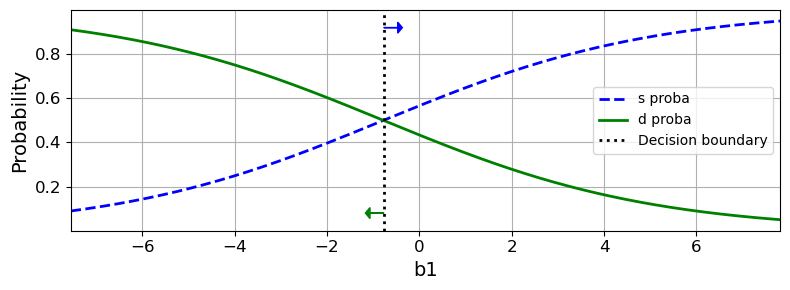

In [17]:
#Generate even spaced 1000 datapoints
X_new = np.linspace(train_X_b1.min() - 5, train_X_b1.max() + 5, 1000).reshape(-1,1)
y_proba = log_reg_b1.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 0] >= 0.5][0, 0]

print('Decision boundary for feature b1:', decision_boundary)

plot_graph('b1', X_new, y_proba, decision_boundary, 'N')

### 1.7.1.2 Feature b2

Decision boundary for feature b2: -0.09914859929138409
Saving figure logistic_regression_plot


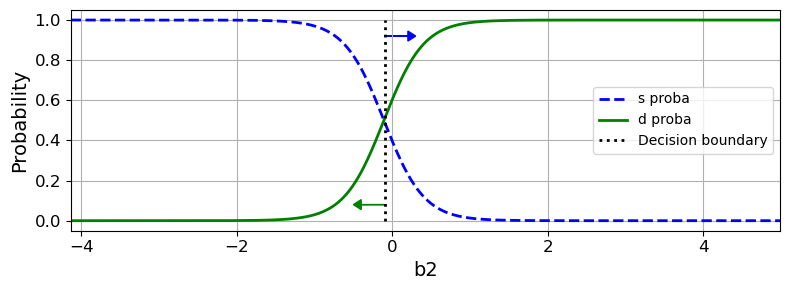

In [18]:
#Generate even spaced 1000 datapoints
X_new = np.linspace(train_X_b2.min() - 3, train_X_b2.max(), 1000).reshape(-1,1)
y_proba = log_reg_b2.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 0] <= 0.5][0, 0]

print('Decision boundary for feature b2:', decision_boundary)

plot_graph('b2', X_new, y_proba, decision_boundary, 'N')

### 1.7.2 Logistic Regression Classifier with all 9 features

In [19]:
train_X_all, train_y_all, test_X_all, test_y_all = pre_process_data(features_all, classes_bin)

# Creating an instance of the logistic regression classifier and fitting it on the training data
log_reg_all = LogisticRegression(random_state=42)
log_reg_all.fit(train_X_all, train_y_all.ravel())

# Making predictions on the testing data
y_pred_all = log_reg_all.predict(test_X_all)

# Evaluation of model performance
report_all = classification_report(test_y_all, y_pred_all)

print("\n", report_all)


               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        59
         1.0       0.98      1.00      0.99        54

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



The following cell plots the estimated probabilities and decision boundary for a model considering all features. This is done using the score value of the linear part from the logistic regression model in the x-axis.

10 instances of the testing set are then added to the plot and verfied if the classifier has made a correct decision.

Decision boundary for feature all 9 features: 0.00144302307305344
Saving figure logistic_regression_plot


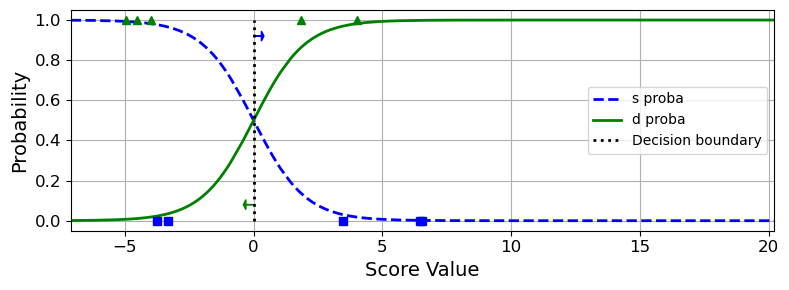

In [20]:
coef_matrix = log_reg_all.coef_ # Coefficient of the features in the decision function
bias = log_reg_all.intercept_   # Bias term added to the decision function 

num_rows, num_cols = train_X_all.shape
x_axis = np.zeros(shape=(num_rows,1))
y_axis = np.zeros(shape=(num_rows,1))

# Computes the dot product of the training data with the coefficient terms and add the bias term to obtain the score value
for idx in range(num_rows):
    x_axis[idx] = np.dot(np.atleast_2d(train_X_all[idx]), coef_matrix.T) + bias

# Get the probability predictions based on the score value
y_axis = log_reg_all.predict_proba(train_X_all)

# Sort both arrays in ascending order for smooth plotting
x_axis, y_axis = zip(*sorted(zip(x_axis, y_axis)))

decision_boundary_all = np.array(x_axis)[np.array(y_axis)[:, 1] >= 0.5][0, 0]
print('Decision boundary for feature all 9 features:', decision_boundary_all)
plot_graph('Score Value', np.array(x_axis), np.array(y_axis), decision_boundary_all, 'Y')

## 1.8 Precision vs Recall

### 1.8.1 Precision and recall vs threshold

The graph shows the precision and recall plotted against the threshold for the logistic regression classifier considering all 9 features. 
- Precision refers to the accuracy of the positive predictions 
    - precision = TP / (TP + FP)
- Recall refers to the sensitivity of the true positive rate 
    - recall = TP/(TP + FN)
- The precion-recall tradeoff states that increasing the precision of a classifier reduces the recall and increasing the recall reduces precision. Therefore, we cannot have both at the same time. 

The logistic regression classifier trained on all 9 features performs well as the trade off drops slowly as the threshold increases and decreases.

The threshold value of 0.48 was chosen by plotting precision against recall in section 1.8.2. The point that maximizes precision and recall was chosen. 

Saving figure precision_recall_vs_threshold_plot


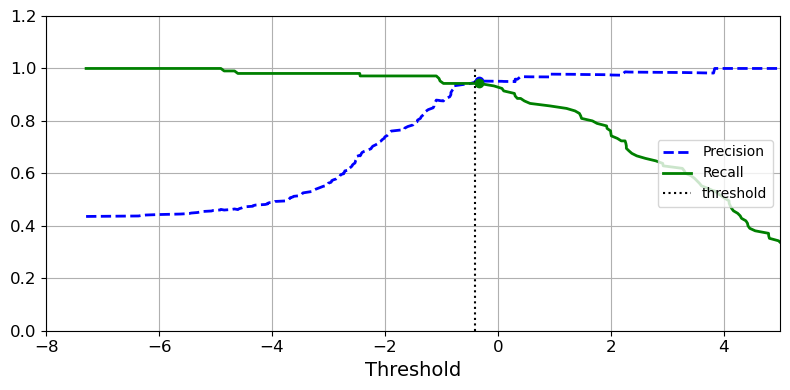

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(log_reg_all, train_X_all, train_y_all.ravel(), cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(train_y_all, y_scores)
threshold = -0.4

plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-8, 5, 0, 1.2])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

### 1.8.2 Precision vs recall

Saving figure precision_vs_recall_plot


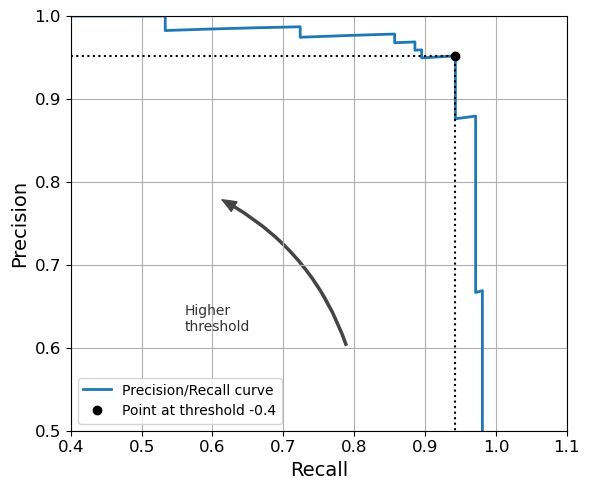

In [22]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold -0.4")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0.4, 1.1, 0.5, 1.0])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

## 1.9 K-Nearest-Neighbour (kNN) Classifier

A grid search with 3 fold cross validation was used to tune the kNN classifier. Values from 1-15 were sampled and the best value for k came out to be 5. This value was then used to train a kNN classifier and was evaluated on the test set. This proved to be very effective as the classifier reported an accuracy score of 0.99 and a f1 score of 0.99. 

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Getting new instances of the training and testing set
train_X_knn, train_y_knn, test_X_knn, test_y_knn = pre_process_data(features_all, classes_bin)

# Create a kNN classifier 
kNN = KNeighborsClassifier(weights='uniform', algorithm='auto', p=2)
# Define the hyperparameters and their possible values for grid search
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
}

# Create a grid search object with 3-fold cross-validation
grid_search = GridSearchCV(kNN, param_grid, cv=3, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(train_X_knn, np.ravel(train_y_knn))

print("Best value of k:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

Best value of k: {'n_neighbors': 5}
Cross-validation score: 0.9253600823045267


In [24]:
train_X_knn, train_y_knn, test_X_knn, test_y_knn = pre_process_data(features_all, classes_bin)

kNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)
kNN.fit(train_X_knn, train_y_knn.ravel())

# Making predictions on the testing data
y_pred_knn = kNN.predict(test_X_knn)

# Evaluation of model performance
report_knn = classification_report(test_y_knn, y_pred_knn)

print(report_knn)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        59
         1.0       0.98      1.00      0.99        54

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



## 1.10 Comparing Logistic Regression and kNN

As seen in the cell below both classifiers have the same accuracy score. 

The kNN classifier performs better in the ROC curves.

The kNN classifier perfoms better in the confusion matrix as it has no false positives while the logistic regression classifier has one false positive. 

In [25]:
log_reg_accuracy = accuracy_score(test_y_all, y_pred_all)
kNN_accuracy = accuracy_score(test_y_knn, y_pred_knn)

print("Accuracy of the logistic regression classifier:", log_reg_accuracy)
print("Accuracy of the kNN classifier:", kNN_accuracy)

Accuracy of the logistic regression classifier: 0.9911504424778761
Accuracy of the kNN classifier: 0.9911504424778761


In [26]:
from sklearn.metrics import roc_curve

def plot_roc(y_stuff, y_scores_stuff, label=None):
    fpr, tpr, threshold = roc_curve(y_stuff, y_scores_stuff.ravel())

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")

    # extra code – just beautifies and saves Figure 3–7
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    plt.axis([0, 1, 0, 1.1])
    plt.legend(loc="lower right", fontsize=13)
    save_fig("roc_curve_plot")
    plt.grid(True)      

Saving figure roc_curve_plot
Saving figure roc_curve_plot


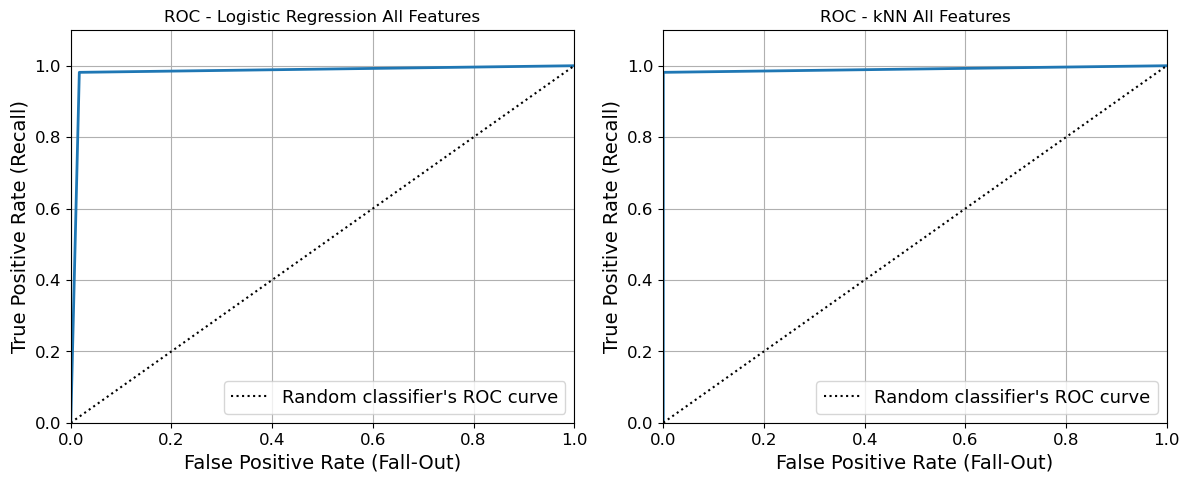

In [27]:
y_scores_log = cross_val_predict(log_reg_all, test_X_all, test_y_all.ravel(), cv=3)
y_scores_knn = cross_val_predict(kNN, test_X_knn, test_y_knn.ravel(), cv=3)

fig_roc = plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
plot_roc(test_y_all, y_scores_log)
plt.title('ROC - Logistic Regression All Features')

plt.subplot(2,2,2)
plot_roc(test_y_knn, y_scores_knn)
plt.title('ROC - kNN All Features')

plt.show()

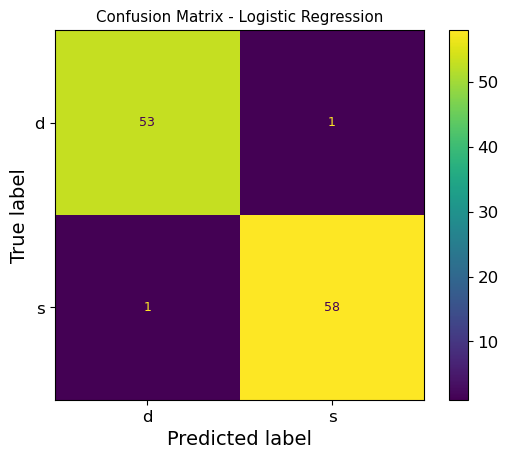

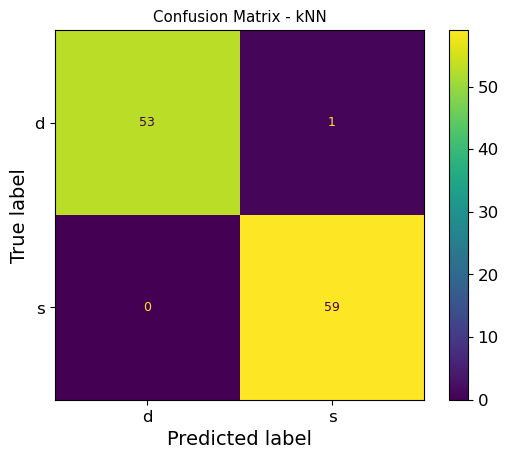

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  
ConfusionMatrixDisplay.from_predictions(enc.inverse_transform(test_y_all), enc.inverse_transform(y_scores_log.reshape(-1,1)))
plt.title('Confusion Matrix - Logistic Regression')

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(enc.inverse_transform(test_y_knn), enc.inverse_transform(y_scores_knn.reshape(-1,1)))
plt.title('Confusion Matrix - kNN')

plt.show()

## 1.11 Cross Validation Scores

Cross validation splits the training set into 3 nonoverlapping folds. The classifier is evaluated on each fold with the other folds being used as training sets. This gives us 3 evaluation scores. The mean of these scores is then displayed.

- The logistic regression model has a higher cross validation score than the kNN classifier. This indcates that it has better generalisation capacity. 

In [45]:
from sklearn.model_selection import cross_val_score

# Perform 3-fold cross-validation 
cv_scores_log_reg = cross_val_score(log_reg_all, train_X_all, train_y_all.ravel(), cv=3)
cv_scores_knn = cross_val_score(kNN, train_X_knn, train_y_knn.ravel(), cv=3)

print("Logistic Regression mean CV score:", cv_scores_log_reg.mean())
print("k-NN mean CV score:", cv_scores_knn.mean())

Logistic Regression average CV score: 0.9461419753086421
k-NN average CV score: 0.9253600823045267


# 2 Multiclass Classification

The following steps will be performed with all classes in the Forest type mapping Data Set

## 2.1 Support Vector Machine Classifier 

Use the Support Vector Machine Classifier implemented in the sklearn.svm.SVC class to perform multiclass classification using the one-versus-one strategy. 

Use grid search and 3-fold cross validation to find the optimal values for the two hyper parameters 

Hyper parameters:
- C (regularization parameter)
- kernel (linear, poly, rbf, sigmoid, precomputed)
- degree (only for poly kernel)
- gamma (rbf, poly, sigmoid)
- coef0 (poly and sigmoid)

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Getting new instances of the training and testing set
train_X_svc, train_y_svc, test_X_svc, test_y_svc = pre_process_data(features_all, classes_all)

# Create an SVM classifier using the hyperparameter decision_function_shape='ovo' for a one-versus-one strategy
svc = SVC(decision_function_shape='ovo')

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create a grid search object with 3-fold cross-validation
grid_search_svc = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy')

# Fit the grid search object to the training data
grid_search_svc.fit(train_X_svc, np.ravel(train_y_svc))


# Print the best hyperparameters
print("Best hyperparameters:", grid_search_svc.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search_svc.best_score_)

# Evaluate the classifier with the best hyperparameters on the test set
svc = grid_search_svc.best_estimator_ # refits the svc classifier with the best hyperparameters
test_accuracy_svc = svc.score(train_X_svc, np.ravel(train_y_svc))
print("Test set accuracy:", test_accuracy_svc)

Best hyperparameters: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.892400045305244
Test set accuracy: 0.9076923076923077


## 2.2 Softmax Regression

In [68]:
# Getting new instances of the training and testing set
train_X_softmax, train_y_softmax, test_X_softmax, test_y_softmax = pre_process_data(features_all, classes_all)

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 2, 3, 4, 5],
    'solver': ['lbfgs', 'newton-cg']
}

softmax = LogisticRegression(multi_class='multinomial')

# Create a grid search object with 3-fold cross-validation
grid_search_softmax = GridSearchCV(softmax, param_grid, cv=3, scoring='accuracy')

# Fit the grid search object to the training data
grid_search_softmax.fit(train_X_softmax, np.ravel(train_y_softmax))


# Print the best hyperparameters
print("Best hyperparameters:", grid_search_softmax.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search_softmax.best_score_)

# Evaluate the classifier with the best hyperparameters on the test set
softmax = grid_search_softmax.best_estimator_
test_accuracy_softmax = softmax.score(train_X_softmax, np.ravel(train_y_softmax))
print("Test set accuracy:", test_accuracy_softmax)

Best hyperparameters: {'C': 2, 'solver': 'lbfgs'}
Best cross-validation score: 0.8738815267867256
Test set accuracy: 0.9046153846153846


## 2.3 kNN Classifier

In [69]:
# Getting new instances of the training and testing set
train_X_kNN1, train_y_kNN1, test_X_kNN1, test_y_kNN1 = pre_process_data(features_all, classes_all)

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

kNN1 = KNeighborsClassifier()

# Create a grid search object with 3-fold cross-validation
grid_search_knn = GridSearchCV(kNN1, param_grid, cv=3, scoring='accuracy')

# Fit the grid search object to the training data
grid_search_knn.fit(train_X_kNN1, np.ravel(train_y_kNN1))


# Print the best hyperparameters
print("Best hyperparameters:", grid_search_knn.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search_knn.best_score_)

# Evaluate the classifier with the best hyperparameters on the test set
kNN1 = grid_search_knn.best_estimator_
test_accuracy_knn = kNN1.score(train_X_kNN1, np.ravel(train_y_kNN1))
print("Test set accuracy:", test_accuracy_knn)

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 8}
Best cross-validation score: 0.8585343753539472
Test set accuracy: 0.8646153846153846


## 2.4 Comparing the three classifiers

The two graphs below represent the cross-validation scores and the test accuracy scores for the SVC, softmax and kNN classifiers. 

- The SVM classifier performed the best with the highest accuracy and cross-validationn scores
- The kNN classifier performed the worst of the three classifiers

It is important to note that all three models performed well and can be said to have good generalization capacity.

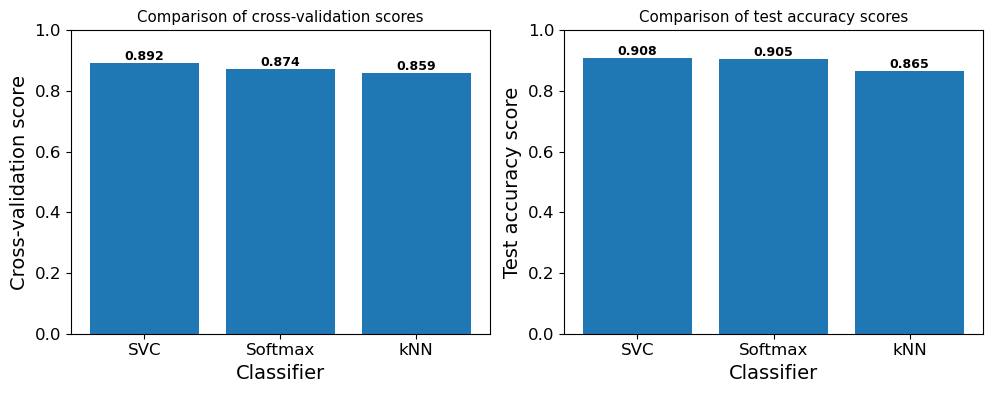

In [122]:
labels = ['SVC', 'Softmax', 'kNN']
cv_score = [grid_search_svc.best_score_, grid_search_softmax.best_score_, grid_search_knn.best_score_]
accuracy_score = [test_accuracy_svc, test_accuracy_softmax, test_accuracy_knn]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the cross-validation scores in the first subplot
ax1.bar(labels, cv_score)
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('Classifier')
ax1.set_ylabel('Cross-validation score')
ax1.set_title('Comparison of cross-validation scores')

# Annotate the values at the top of each bar
for i, v in enumerate(cv_score):
    ax1.text(i, v + 0.01, str(round(v, 3)), ha='center', fontweight='bold')

# Plot the test accuracy scores in the second subplot
ax2.bar(labels, accuracy_score)
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('Classifier')
ax2.set_ylabel('Test accuracy score')
ax2.set_title('Comparison of test accuracy scores')

# Annotate the values at the top of each bar
for i, v in enumerate(accuracy_score):
    ax2.text(i, v + 0.01, str(round(v, 3)), ha='center', fontweight='bold')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# 3 Implementing k-NN algorithm to do regression

The following cells use the class KNeighborsRegressor to perform regression on the California Housing Prices dataset

In [33]:
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [35]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 3.1 Cleaning the data

In [147]:
# Preparing the encoder
enc_cat = OrdinalEncoder()
# Encodes the ocean proximity category
housing['ocean_proximity'] = enc_cat.fit_transform(housing['ocean_proximity'].values.reshape(-1,1))

In [148]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_transformed = imputer.fit_transform(housing)

housing = pd.DataFrame(housing_transformed, columns=housing.columns)

In [149]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into a training set (80%) and a testing set (20%)
housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=42)

# Splitting training set into x and y components
housing_train_X = housing_train.drop("median_house_value", axis=1)
housing_train_y = housing_train["median_house_value"].copy()

# Splitting testing set into x and y components
housing_test_X = housing_test.drop("median_house_value", axis=1)
housing_test_y = housing_test["median_house_value"].copy()

In [150]:
standard_scaler_housing = StandardScaler()

cols = housing.drop("median_house_value", axis=1)

# Fit the standard scaler to the training set
housing_train_X = standard_scaler_housing.fit_transform(housing_train_X)
housing_train_X_scaled = pd.DataFrame(housing_train_X, columns=cols.columns)


# Transform the testing set
housing_test_X = standard_scaler_housing.transform(housing_test_X)
housing_test_X_scaled = pd.DataFrame(housing_test_X, columns=cols.columns)

## 3.2 RSME of the whole set

In [151]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

kNN_reg = KNeighborsRegressor(n_neighbors=5)
kNN_reg.fit(housing_train_X, housing_train_y)

# Make predictions on the test set
y_pred = kNN_reg.predict(housing_test_X)

# Compute the RMSE
rmse = np.sqrt(mean_squared_error(housing_test_y, y_pred))
print("RMSE:", rmse)

RMSE: 63132.99219553722


## 3.3 Feature Selection

Feature importance scores are used to determine the relativve importance of each feature in the housing dataset. The following cells will show two methods: linear regression and random forest to obtain the feature importance. The features that show up as the most important will be selected to train the KNeighborsRegressor.

### 3.3.1 Feature Selection with linear regression

C:\Users\Joo_Kai\miniconda3\envs\cits5508-2023\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


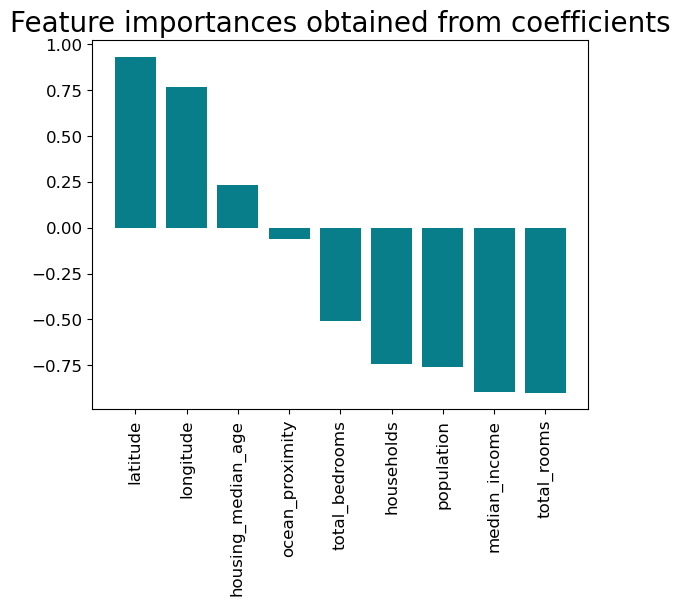

In [155]:
selector_log_reg = LogisticRegression()
selector_log_reg.fit(housing_train_X, housing_train_y)

importances = pd.DataFrame(data={
    'Attribute': housing_train_X_scaled.columns,
    'Importance': selector_log_reg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### 3.3.2 Feature Selection with random forest regressor

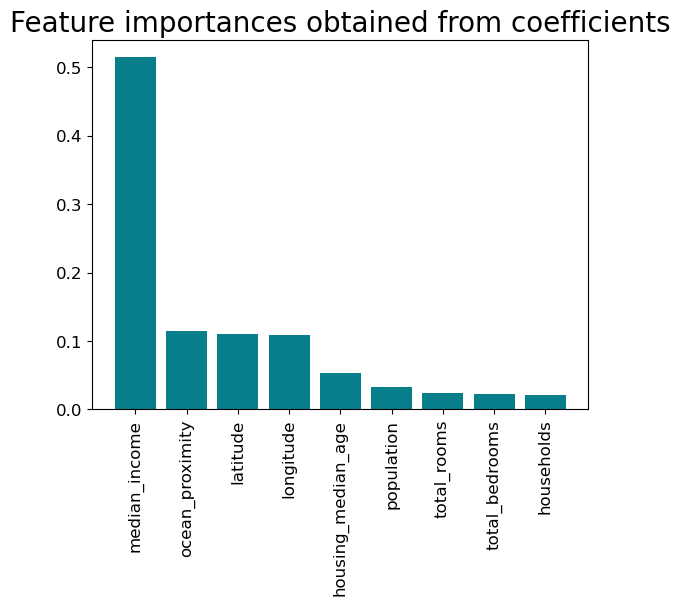

In [156]:
from sklearn.ensemble import RandomForestRegressor

selector_random_forest = RandomForestRegressor()
selector_random_forest.fit(housing_train_X, housing_train_y)

importances = pd.DataFrame(data={
    'Attribute': housing_train_X_scaled.columns,
    'Importance': selector_random_forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### 3.3.3 Feature selection with linear regressor

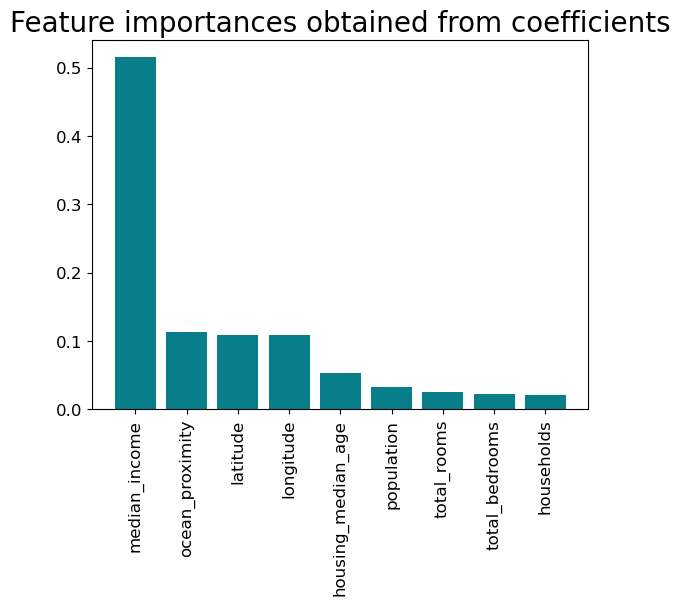

In [154]:
from sklearn.linear_model import LinearRegression

selector_lin_reg = LinearRegression()
selector_lin_reg.fit(housing_train_X, housing_train_y)

importances = pd.DataFrame(data={
    'Attribute': housing_train_X_scaled.columns,
    'Importance': selector_random_forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## 3.4 k Neighbors Regressor with selected data

The three graphs above were inspected and the 4 features from each with the greatest weights were selected. Those features were used to train a model.

In [134]:
features_log_reg = ['median_income', 'longitude', 'latitude', 'total_rooms']
features_random_forest = ['median_income', 'longitude', 'latitude', 'ocean_proximity']

In [135]:
def print_RMSE(features, feature):
    train_X_selected = housing_train_X_scaled[features]
    test_X_selected = housing_test_X_scaled[features]

    # Train k-NN regressor
    knn_uniform = KNeighborsRegressor(n_neighbors=5)
    knn_uniform.fit(train_X_selected, housing_train_y)
    # Make predictions on the test set
    y_pred_uniform = knn_uniform.predict(test_X_selected)
    rmse = np.sqrt(mean_squared_error(housing_test_y, y_pred_uniform))

    print("RMSE of {} is: {}".format(feature, rmse))

In [141]:
print("RMSE of {} is: {}".format('All features', rmse))
print_RMSE(features_log_reg, 'Log Reg')
print_RMSE(features_random_forest, 'Random Forest')

RMSE of All features is: 63132.99219553722
RMSE of Log Reg is: 66865.63850936516
RMSE of Random Forest is: 57212.52078989575


The best model from the cell above is the kNN regressor fitted with the features from the random forest regressor. We will now use this model to experiment with distance.

It can be seen that having the weights set to distance does improve the performance of the kNN regressor. This is because closer neighbours have a greater influence on the score than neighbors that are further away. 

In [140]:
train_X_selected = housing_train_X_scaled[features_random_forest]
test_X_selected = housing_test_X_scaled[features_random_forest]

# Train k-NN regressors with 'uniform' and 'distance' weights
knn_uniform = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_uniform.fit(train_X_selected, housing_train_y)

knn_distance = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_distance.fit(train_X_selected, housing_train_y)

# Make predictions on the test set
y_pred_uniform = knn_uniform.predict(test_X_selected)
rmse1 = np.sqrt(mean_squared_error(housing_test_y, y_pred_uniform))

y_pred_distance = knn_distance.predict(test_X_selected)
rmse2 = np.sqrt(mean_squared_error(housing_test_y, y_pred_distance))

print("RMSE of {} is: {}".format('uniform', rmse1))
print("RMSE of {} is: {}".format('distance', rmse2))

RMSE of uniform is: 57212.52078989575
RMSE of distance is: 56402.926915995704
